In [ ]:
Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

In [ ]:
Min-Max scaling, also known as normalization, is a data preprocessing technique that scales the values of a feature to a specific 
range, typically between 0 and 1. It transforms the data by linearly mapping the original feature values to the desired range 
without changing the shape of the original distribution.



In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

restaurant_A = [24, 25, 28, 23, 22, 20, 27]
restaurant_B = [31, 33, 35, 30, 32, 36]

# MinMaxScaler
scaler = MinMaxScaler()

scaled_A = scaler.fit_transform(np.array(restaurant_A).reshape(-1, 1))
scaled_B = scaler.transform(np.array(restaurant_B).reshape(-1, 1))  

print("Scaled waiting times for Restaurant A:")
print(scaled_A)

print("\nScaled waiting times for Restaurant B:")
print(scaled_B)


Scaled waiting times for Restaurant A:
[[0.5  ]
 [0.625]
 [1.   ]
 [0.375]
 [0.25 ]
 [0.   ]
 [0.875]]

Scaled waiting times for Restaurant B:
[[1.375]
 [1.625]
 [1.875]
 [1.25 ]
 [1.5  ]
 [2.   ]]


In [ ]:
Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

In [ ]:
The unit vector technique, also known as vector normalization or L2 normalization, is a method used in feature scaling to scale feature vectors such that their Euclidean norm (L2 norm) equals 1. This technique ensures that each feature vector has a consistent magnitude or length while preserving its direction.

The formula for unit vector scaling of a feature vector \( x \) is:

\[ x_{\text{unit}} = \frac{x}{\lVert x \rVert_2} \]

Original data:
- Height (in centimeters): 150, 160, 170
- Weight (in kilograms): 50, 60, 70

Unit Vector Scaling:

1. Calculate the Euclidean norm of each feature vector:
   - For height: \( \sqrt{150^2 + 160^2 + 170^2} \)
   - For weight: \( \sqrt{50^2 + 60^2 + 70^2} \)

2. Divide each feature vector by its respective Euclidean norm to obtain unit-scaled vectors.

Min-Max Scaling:

1. For each feature, find the minimum and maximum values:
   - Minimum height: 150, Maximum height: 170
   - Minimum weight: 50, Maximum weight: 70

2. Scale each feature using Min-Max scaling formula:

\[ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]

implement this in Python:

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import numpy as np

height = np.array([150, 160, 170]).reshape(-1, 1)
weight = np.array([50, 60, 70]).reshape(-1, 1)

min_max_scaler = MinMaxScaler()
height_min_max_scaled = min_max_scaler.fit_transform(height)
weight_min_max_scaled = min_max_scaler.fit_transform(weight)

normalizer = Normalizer(norm='l2')
height_unit_scaled = normalizer.fit_transform(height)
weight_unit_scaled = normalizer.fit_transform(weight)

print("Min-Max scaled height:")
print(height_min_max_scaled)
print("\nMin-Max scaled weight:")
print(weight_min_max_scaled)

print("\nUnit-scaled height:")
print(height_unit_scaled)
print("\nUnit-scaled weight:")
print(weight_unit_scaled)


Min-Max scaled height:
[[0. ]
 [0.5]
 [1. ]]

Min-Max scaled weight:
[[0. ]
 [0.5]
 [1. ]]

Unit-scaled height:
[[1.]
 [1.]
 [1.]]

Unit-scaled weight:
[[1.]
 [1.]
 [1.]]


In [ ]:
Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

In [ ]:
Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large
data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

PCA works:

1. Standardize the data: PCA works best when the data is standardized (i.e., each feature has a mean of 0 and a standard deviation of 1). This step ensures that all features contribute equally to the analysis.

2. Compute the covariance matrix: Next, PCA computes the covariance matrix of the standardized data. The covariance matrix describes the relationships between pairs of variables in the dataset.

3. Calculate the eigenvectors and eigenvalues: PCA then calculates the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance (principal components), while eigenvalues represent the magnitude of variance along each eigenvector.

4. Select principal components: PCA selects the top \( k \) eigenvectors (principal components) corresponding to the \( k \) largest eigenvalues. These principal components capture most of the variance in the data.

5. Transform the data: Finally, PCA projects the original data onto the selected principal components to obtain the reduced-dimensional representation of the data.


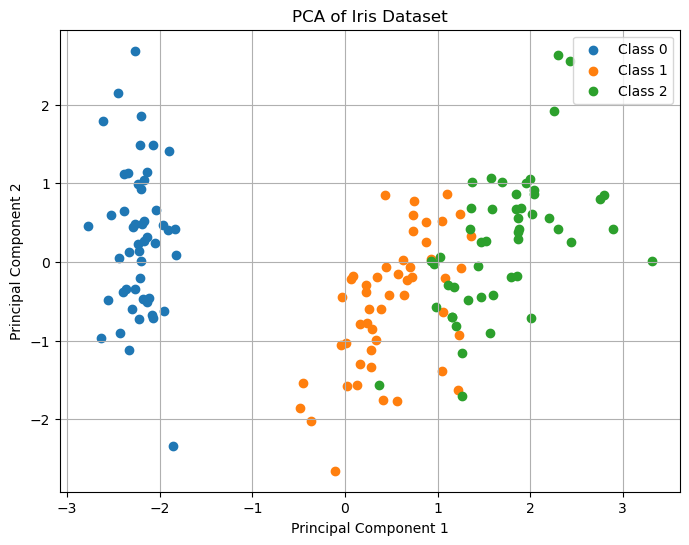

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for target in set(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=f'Class {target}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

In [ ]:
1. Feature Extraction:
   - Definition: Feature extraction is a process where we transform high-dimensional data into a lower-dimensional form.
   - Importance: It plays a significant role in data preprocessing and machine learning.
   - Goal: The main objective is to retain relevant information while reducing computational cost and removing redundant data patterns.
   -Examples: Creating new features by combining existing ones (e.g., calculating Body Mass Index from height and weight).

2. PCA:
   - Purpose: PCA is a powerful tool for feature extraction.
   - Concept: Imagine features as directions in space. PCA aligns these directions with where the data spreads the most.
   - Scaling: Before applying PCA, features should be scaled (e.g., using StandardScaler).
   - Process: PCA finds eigenvectors of a covariance matrix with the highest eigenvalues and projects data into a new subspace of equal or fewer dimensions.
   - Advantages: Useful for multicollinear or high-dimensional datasets, noise reduction, and data preprocessing.

3. Difference:
   - PCA vs. Feature Selection:
     -PCA: Focuses on finding features that explain variance in the data. It reduces dimensionality but may hide small but significant differentiators.
     - Feature Selection: Ranks input variables based on usefulness for predicting the target value. It considers the target and can be supervised or unsupervised.

In [ ]:
Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In [ ]:

1. Understanding Min-Max Scaling:
   - Min-Max scaling (also known as normalization) transforms the features so that they fall within a specific range, typically [0, 1].
   - It preserves the relative relationships between data points while ensuring that all features have a consistent scale.

2. Steps for Min-Max Scaling:
   - Given features like price, rating, and delivery time, follow these steps:

     a. Identify the Range:
        - Determine the minimum and maximum values for each feature in your dataset.
        - For example:
          - Price: Min = $5, Max = $50
          - Rating: Min = 1.0, Max = 5.0
          - Delivery Time (in minutes): Min = 20, Max = 60

     b. Apply Min-Max Scaling:
        - For each feature, use the following formula:
          \[ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]
          where:
          - \(X\) is the original value of the feature.
          - \(X_{\text{min}}\) is the minimum value of the feature.
          - \(X_{\text{max}}\) is the maximum value of the feature.
        - This scales the feature to the [0, 1] range.

     c. Updated Feature Values:
        - After applying Min-Max scaling, your features will have values between 0 and 1.
        - For example:
          - Scaled Price: \(0.2\) (for $15)
          - Scaled Rating: \(0.75\) (for a rating of 4.5)
          - Scaled Delivery Time: \(0.5\) (for 40 minutes)

3. Benefits of Min-Max Scaling:
   - Ensures that all features contribute equally to the recommendation system.
   - Helps algorithms that rely on distance or similarity calculations (e.g., k-nearest neighbors, clustering) work effectively.
   - Improves convergence speed for gradient-based optimization algorithms (e.g., neural networks).

4. Implementation:
   - You can implement Min-Max scaling using libraries like `scikit-learn` in Python.
   - Remember to fit the scaler on the training data and transform both the training and test data consistently.

In [ ]:
Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

In [ ]:
Using Principal Component Analysis (PCA) to reduce the dimensionality of a dataset for predicting stock prices involves the following steps:

1. Understanding the Dataset:
   - Start by thoroughly understanding the dataset, including the features available, such as company financial data (e.g., revenue, earnings, expenses) and market trends (e.g., stock market indices, interest rates, economic indicators).
   - Determine the importance of each feature in predicting stock prices and identify any redundant or highly correlated features.

2. Data Preprocessing:
   - Ensure that the dataset is cleaned and preprocessed. Handle missing values, outliers, and any other data quality issues appropriately.
   - Standardize the features if they are on different scales. PCA works best when the features have similar magnitudes.

3. Applying PCA:
   - Apply PCA to the standardized dataset to reduce its dimensionality while preserving most of the important information.
   - PCA works by transforming the original features into a new set of orthogonal variables called principal components. These principal components capture the maximum variance in the data.

4. Choosing the Number of Principal Components:
   - Decide on the number of principal components to retain. This can be based on the explained variance ratio, which indicates the proportion of variance explained by each principal component.
   - Choose a number of principal components that retain a significant amount of variance in the data while reducing the dimensionality to a manageable level.

5. Model Building:
   - Use the reduced-dimensional dataset obtained from PCA as input for building the predictive model to forecast stock prices.
   - Apply appropriate machine learning algorithms such as linear regression, decision trees, random forests, or neural networks depending on the nature of the prediction task.

6. Model Evaluation and Refinement:
   - Evaluate the performance of the predictive model using appropriate metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared.
   - Refine the model as needed by fine-tuning hyperparameters, trying different algorithms, or incorporating additional features.

7. Backtesting and Validation:
   - Validate the predictive model using historical data or through backtesting to assess its performance in real-world scenarios.
   - Ensure that the model generalizes well to unseen data and does not overfit the training dataset.

In [ ]:
Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

In [7]:
import numpy as np

data = np.array([1, 5, 10, 15, 20])

#  minimum and maximum values
min_value = np.min(data)
max_value = np.max(data)

min_range = -1
max_range = 1

scaled_data = min_range + (max_range - min_range) * ((data - min_value) / (max_value - min_value))

print("Original data:", data)
print("Min-Max scaled data:", scaled_data)


Original data: [ 1  5 10 15 20]
Min-Max scaled data: [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


In [ ]:
Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

In [ ]:
1. Scree Plot:
   - Plot the eigenvalues of the principal components against their corresponding component numbers.
   - Look for an "elbow" point in the plot, where the eigenvalues start to level off. This point indicates the number of principal components to retain.
   - Retain the principal components corresponding to the components before the elbow point.

2. Cumulative Explained Variance Ratio:
   - Calculate the cumulative explained variance ratio for each principal component.
   - Plot the cumulative explained variance ratio against the number of principal components.
   - Look for a point where the cumulative explained variance ratio reaches a satisfactory threshold (e.g., 90% or 95%).
   - Retain the number of principal components necessary to achieve the desired cumulative explained variance ratio.

3. Domain Knowledge:
   - Consider the specific requirements and constraints of your problem domain.
   - Retain the number of principal components that capture the most important features while keeping the dimensionality low.
   - Prioritize interpretability, computational efficiency, and model performance.